# Sect 24 (v2.1): Regularization

- online-ds-ft-100719
- 01/10/2020


## Objectives

**DISCUSSION:**
- Discuss interactions between variables
- Discuss polynomial regressions
- Discuss Regularization Techniques
    - Ridge Regression (L2 normalization)
    - Lasso Regression (L1 normalization)
- AIC/BIC


**APPLICATION:**
- Lab Walkthrough (pick one):
    - [Sect 28: Ridge and Lasso Regression Lab](https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/section-28-section-recap/ridge-and-lasso-regression-lab)
    
    - [Sect 28: Extensions to Linear Models Lab](https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/section-28-section-recap/extensions-to-linear-models-lab)
    
- Alternative:
    - Walk through feature selection lesson, but re-write so that all of the results for each method are collected into one table for us to review together.
    - [Sect 28: Feature Selection](https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/section-28-section-recap/feature-selection-methods)

In [1]:
# !pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.6.4 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


## Topics Covered in Section 28


- Interactions
- Polynomial Regression    
- [Bias-Variance Trade Off](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)

- Ridge and Lasso Regression / Regularization
- Feature Selection with AIC/BIC


In [7]:
plt.style.use('seaborn-poster')

# Interactions

When variables interact to **cause an effect** to another variable but is **not the sum of their parts**

## Confounding factor

![](images/diet_interaction.png)

## Example of slight interaction (mostly additive)

![](https://github.com/learn-co-students/dsc-2-24-03-interactions-online-ds-sp-000/raw/master/index_files/index_20_0.png)

## Example of interaction (definitley not additive)

![](https://github.com/learn-co-students/dsc-2-24-03-interactions-online-ds-sp-000/raw/master/index_files/index_31_0.png)

### Discussion: 

- Why would we want to do this?
    - Reduce the overall number of features by replacing 2 columns with interactions.
    - Addressing multicollinearity by creating an interaction variable instead of using the multicollinear ones

- When should we do it?
    - Whenever it can help the model, but not required.
    - Can use in hypothesis testing 

### Using seaborn to view interactions

In [19]:
df = fs.datasets.load_autompg()
display(df.head(),df.dtypes)

[i] Source url with details: https://www.kaggle.com/uciml/autompg-dataset


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

https://blog.insightdatascience.com/data-visualization-in-python-advanced-functionality-in-seaborn-20d217f1a9a6

- `sns.factorplot`
- `sns.FacetGrid`

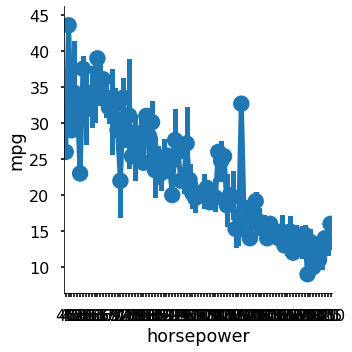

In [20]:

# mpl.rcParams['figure.figsize'] = (10,6)
# fig,ax = plt.subplots()
sns.factorplot(data=df, x='horsepower',y='mpg',cols='origin')#,ax=ax)


# fig.set_size_inches(10,6)

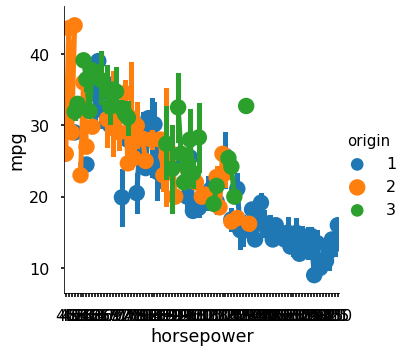

In [18]:
sns.factorplot(data=df, x='horsepower',y='mpg',hue='origin')#,ax=ax)


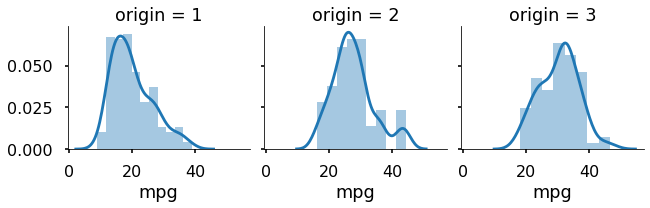

In [24]:
g = sns.FacetGrid(df,col='origin')
g.map(sns.distplot,"mpg")

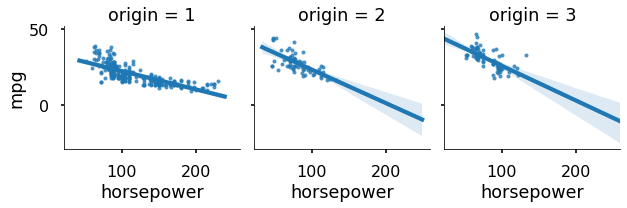

In [27]:
g = sns.FacetGrid(df, col='origin')
g.map(sns.regplot, "horsepower",'mpg',**dict(scatter_kws={'s':16}))

# Polynomial Regressions

Remember we started with (multiple) linear equation:

$$ \large \hat{y} = w_0 + w_1  x_1 + w_2  x_2 + ... + w_N  x_N $$
$$ \large \hat{y} = \sum_{n=0}^{N} w_n x_n $$


**Knowledge check:** Why is this "linear"?

## Making it more complex!

![](https://github.com/learn-co-students/dsc-2-24-05-polynomial-regression-online-ds-sp-000/raw/master/index_files/index_8_0.png)

Imagine making this (start with just one variable):

$$ \large \hat{y} = \beta_0 + \beta_1  x + \beta_2  x^2 + ... + \beta_N  x^N $$
$$ \large \hat{y} = \sum_{n=0}^{N} \beta_n x^n $$

![](https://github.com/learn-co-students/dsc-2-24-05-polynomial-regression-online-ds-sp-000/raw/master/index_files/index_23_0.png)

![](https://github.com/learn-co-students/dsc-2-24-05-polynomial-regression-online-ds-sp-000/raw/master/index_files/index_28_0.png)

For more general (multiple variables):

$$ \large \hat{y} = \beta_{0,0} + \sum_{i=0}^{N} \beta_{1,i} x_1^i + \sum_{i=0}^{N} \beta_{2,i} x_2^i + ... + \sum_{i=0}^{N} \beta_{M,i} x_M^i$$ 

$$ \large \hat{y} = \sum_{i=0}^{N}\sum_{j=0}^{M} \beta_{j,i} x_j^i $$ 


# Regularization techniques

We can "shrink down" prediction variables effects instead of deleting/zeroing them

## Regression Cost Function Previously Used

$$ \large J = \sum_{i=1}^n(y_i - \hat{y})^2  $$

$$ \large J  = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij} + b))^2$$

## Ridge Regression - L2 Norm Regularization

Define a penalty ***hyperparameter*** $\lambda$ for extra terms (large $m$)

<!-- $$ =\sum_{i=1}^n(y_i - \hat{y})^2= \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij} + b))^2 + \lambda \sum_{i=1}^n m_i^2$$/-->

$$\large J_{\text{ridge}}=\sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij})-b)^2 + \lambda \sum_{j=1}^p m_j^2$$

- By adding the penalty term $\lambda$, ridge regression puts a constraint on the coefficients $m$. 
- Therefore, large coefficients will penalize the optimization function. 
    - This shrinks the coefficients and helps to reduce model complexity and multicollinearity.

- With two predictors there is a penalty term m for each predictor.
$$ J_\text{ridge}= \sum_{i=1}^n(y_i - \hat{y})^2 = $$

$$ \sum_{i=1}^n(y_i - ((m_1x_{1i})-b)^2 + \lambda m_1^2 + (m_2x_{2i})-b)^2 + \lambda m_2^2)$$

### Uses

Used mostly to prevent overfitting but since includes all features it can be computationally expensive (for many variables)


**Correlated values spread evenly on coefficients**  [ask victor]

## Lasso Regression - L1 Norm Regularization

"Least Absolute Shrinkage and Selection Operator"

$$\large J_\text{lasso}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij})-b)^2 + \lambda \sum_{j=1}^p \mid m_j \mid$$

If you have two predictors the full equation would look like this (notice that there is a penalty term `m` for each predictor in the model - in this case, two): 
$$ \text{cost_function_lasso}= \sum_{i=1}^n(y_i - \hat{y})^2 = $$

$$\sum_{i=1}^n(y_i - ((m_1x_{1i})-b)^2 + \lambda \mid m_1 \mid) + ((m_2x_{2i})-b)^2 + \lambda \mid m_2 \mid) $$

### Uses

Useful since absolute value can be set at zero: performs estimation & selection (good for many variables) --> ***sparse solution***

### Using Regularization

- Make sure to standardize the data before performing ridge or lasso regression, otherwise features with large values/units will be unfairly penalized.
- Fit-transform the training data, only transform the test data


`from sklearn.linear_model import Lasso, Ridge, LinearRegression
`

# AIC/BIC

### Uses of AIC and BIC

- Performing feature selection: comparing models with only a few variables and more variables, computing the AIC/BIC and select the features that generated the lowest AIC or BIC
- Similarly, selecting or not selecting interactions/polynomial features depending on whether or not the AIC/BIC decreases when adding them in
- Computing the AIC and BIC for several values of the regularization parameter in Ridge/Lasso models and selecting the best regularization parameter, and many more! 

### Akaike's Information Criterion (AIC)


The formula for the AIC, invented by Hirotugu Akaike in 1973 and short for "Akaike's Information Criterion" is given by:

#### $$ \text{AIC} = -2\ln(\hat{L}) + 2k $$

Where:
* $k$ : length of the parameter space (i.e. the number of features)
* $\hat{L}$ : the maximum value of the likelihood function for the model

Another way to phrase the equation is:

$$ \text{AIC(model)} =  - 2 * \text{log-likelihood(model)} + 2 * \text{length of the parameter space} $$


- AIC used to **compare** models with unbounded units not independently interpretable

- If model uses Maximum Likelihood Estimation, log-likelihood is automatically computed, so AIC is easy to calculate.
- AIC acts like penalized log-likelihood criterion, balancing good fit and complexity

- In Python, the AIC is built into `statsmodels` and in `sklearn` (such as `LassoLarsIC`, which you'll use in the upcoming lab). 

### Bayesian Information Criterion (BIC)

- Bayesian alternative to AIC, used the same way.

 $$\large \text{BIC} = -2\ln(\hat L) + \ln(n)*k $$


where:

* $\hat{L}$ and $k$ are the same as in AIC
* $n$ : the number of data points (the sample size)

Another way to phrase the equation is:

$$ \text{BIC(model)} = -2 * \text{log-likelihood(model)} + \text{log(number of observations)} * \text{(length of the parameter space)} $$

# ACTIVITY

[**Option 1: Extensions to Linear Models Lab**](https://github.com/learn-co-students/dsc-extensions-to-linear-models-lab-online-ds-ft-100719/)

[**Option 2: Rewrite Feature Selection Methods Lesson to easily capture and compare results across methods.**](https://github.com/learn-co-students/dsc-feature-selection-methods-online-ds-ft-100719)


[**Option 3: Ridge and Lasso Regression**](https://github.com/learn-co-students/dsc-ridge-and-lasso-regression-lab-online-ds-ft-100719/)

[**Option 4: See my attempts at manually creating a linear regression AR model to attempt to use Lasso regression to remove coefficients**]
 - Note, still figuring out final bits, which we would discuss together.

# APPENDIX

## Bias-Variance Trade Off


$$ \text{MSE} = \text{Bias}(\hat{y})^2 + \text{Var}(\hat{y}) + \sigma^2$$

- Bias arises when wrong assumptions are made when training a model. For example, an interaction effect is missed, or we didn't catch a certain polynomial relationship. Because of this, our algorithm misses the relevant relations between predictors and the target variable. Note how this is similar to underfitting!

- Variance arises  when a model is too sensitive to small fluctuations in the training set. When variance is high, random noise in the training data is modeled, rather than the intended outputs. This is overfitting!